In [35]:
import pandas as pd
import cmdstanpy as stan
import arviz as az
import numpy as np

In [4]:
logreg_model = stan.from_csv('inference/logreg/*[1-4].csv')

In [20]:
hier_model = stan.from_csv('inference/hier/*[1-4].csv')

In [5]:
logreg_model.diagnose()

INFO:cmdstanpy:Processing csv files: inference/logreg/logreg-202111282212-3.csv, inference/logreg/logreg-202111282212-2.csv, inference/logreg/logreg-202111282212-1.csv, inference/logreg/logreg-202111282212-4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


'Processing csv files: inference/logreg/logreg-202111282212-3.csv, inference/logreg/logreg-202111282212-2.csv, inference/logreg/logreg-202111282212-1.csv, inference/logreg/logreg-202111282212-4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\nNo divergent transitions found.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete, no problems detected.'

In [9]:
method_vars = logreg_model.method_variables()

In [10]:
method_vars.keys()

dict_keys(['lp__', 'accept_stat__', 'stepsize__', 'treedepth__', 'n_leapfrog__', 'divergent__', 'energy__'])

In [12]:
method_vars['treedepth__'].max()

7.0

In [19]:
method_vars['accept_stat__']

0.394258

In [25]:
method_vars = hier_model.method_variables()

In [28]:
(method_vars['treedepth__'] == 10).mean()

6.25e-05

In [30]:
method_vars['divergent__'].mean()

0.2199375

In [39]:
np.unique(method_vars['treedepth__'], return_counts=True)

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 890,  809,  426,  679,  962, 4329, 4897, 2959,   48,    1]))

In [42]:
hier_model.diagnose()

INFO:cmdstanpy:Processing csv files: inference/hier/hier-202111282213-4.csv, inference/hier/hier-202111282213-3.csv, inference/hier/hier-202111282213-2.csv, inference/hier/hier-202111282213-1.csv

Checking sampler transitions treedepth.
1 of 16000 (0.0063%) transitions hit the maximum treedepth limit of 10, or 2^10 leapfrog steps.
Trajectories that are prematurely terminated due to this limit will result in slow exploration.
For optimal performance, increase this limit.

Checking sampler transitions for divergences.
3519 of 16000 (22%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

The following parameters had split R-hat greater than 1.1:
  beta[2,2], theta[42], th

"Processing csv files: inference/hier/hier-202111282213-4.csv, inference/hier/hier-202111282213-3.csv, inference/hier/hier-202111282213-2.csv, inference/hier/hier-202111282213-1.csv\n\nChecking sampler transitions treedepth.\n1 of 16000 (0.0063%) transitions hit the maximum treedepth limit of 10, or 2^10 leapfrog steps.\nTrajectories that are prematurely terminated due to this limit will result in slow exploration.\nFor optimal performance, increase this limit.\n\nChecking sampler transitions for divergences.\n3519 of 16000 (22%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nThe following parameters had split R-hat greater than 1.1:\n  beta[2,2], theta[42

/Users/leevi/.pyenv/versions/3.10.0/envs/bda-venv/lib/python3.10/site-packages/arviz/plots/backends/matplotlib/pairplot.py:238: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of resulting pair plots with these variables, generating only a 8x8 grid
  warnings.warn(


array([[<AxesSubplot:ylabel='alpha_sigma'>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='beta_mu\n0'>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='beta_mu\n1'>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='beta_mu\n2'>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='beta_mu\n3'>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='beta_mu\n4'>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        

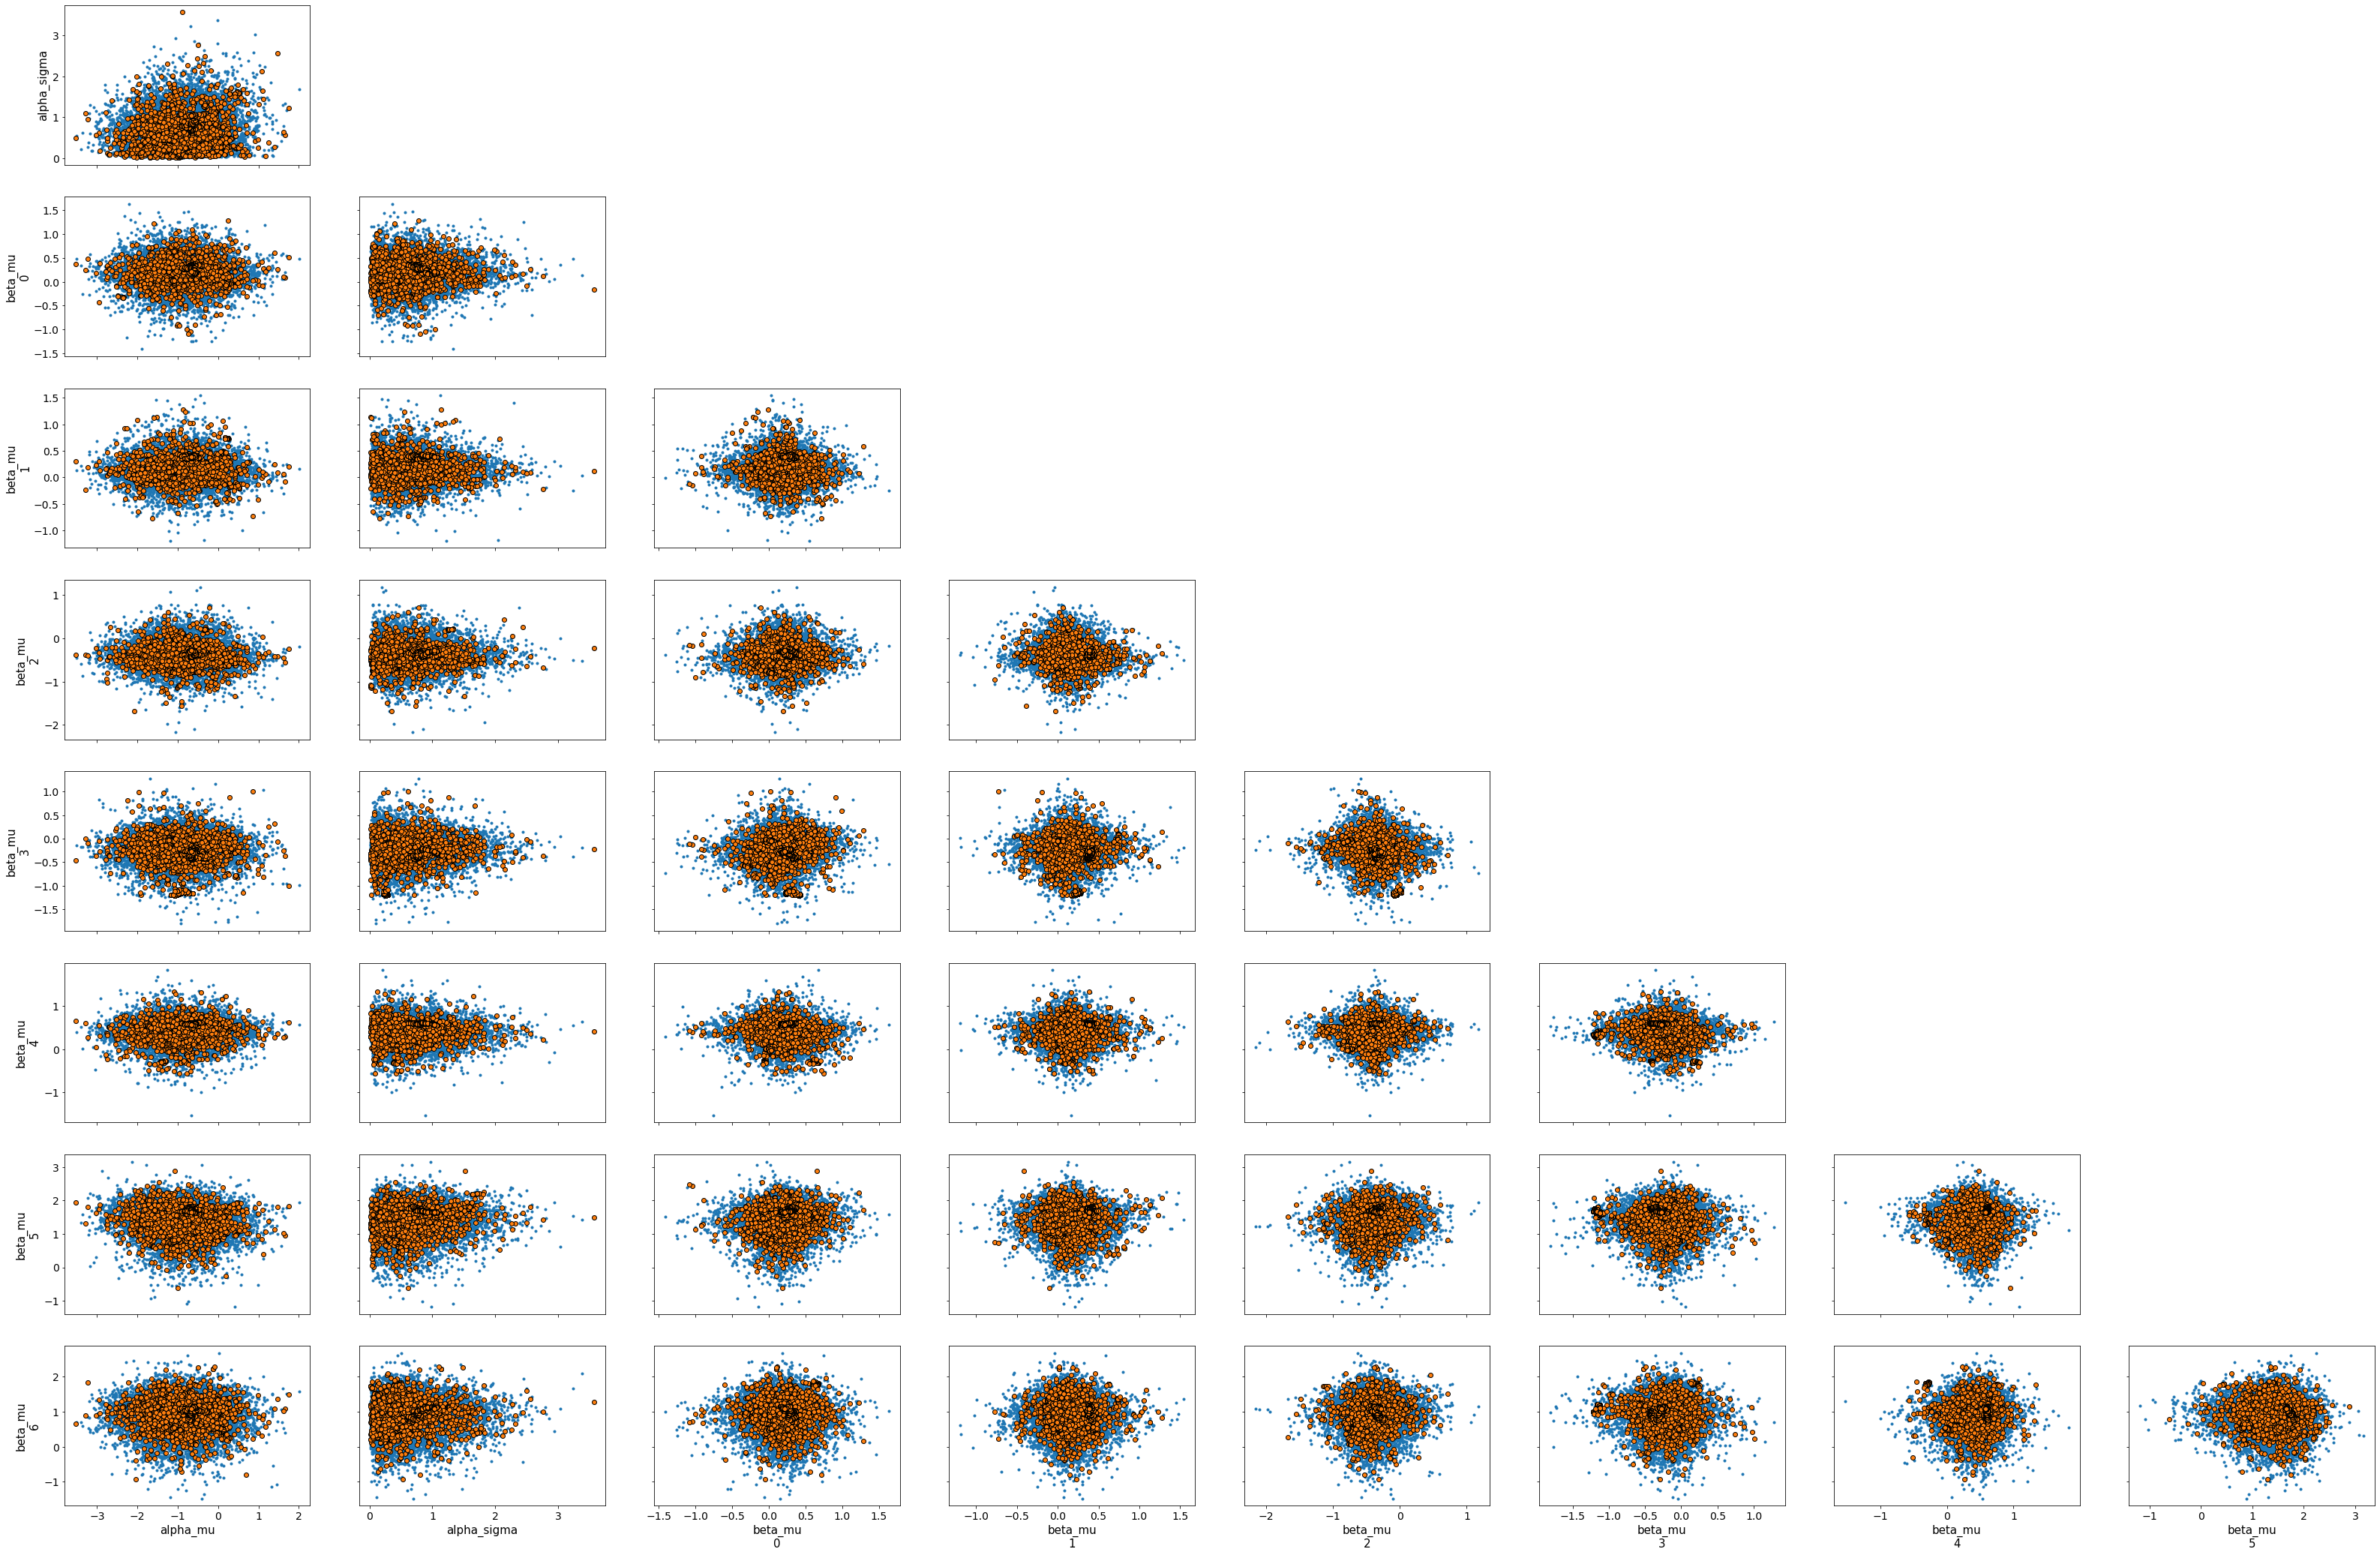

In [41]:
data = az.from_cmdstanpy(hier_model)
az.plot_pair(data, divergences=True)

In [84]:
model = stan.from_csv('inference_adapt_delta/hier/*[1-4].csv')

In [85]:
model.diagnose()

INFO:cmdstanpy:Processing csv files: inference_adapt_delta/hier/hier-202112061718-2.csv, inference_adapt_delta/hier/hier-202112061718-3.csv, inference_adapt_delta/hier/hier-202112061718-1.csv, inference_adapt_delta/hier/hier-202112061718-4.csv

Checking sampler transitions treedepth.
8 of 16000 (0.05%) transitions hit the maximum treedepth limit of 12, or 2^12 leapfrog steps.
Trajectories that are prematurely terminated due to this limit will result in slow exploration.
For optimal performance, increase this limit.

Checking sampler transitions for divergences.
462 of 16000 (2.9%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all par

"Processing csv files: inference_adapt_delta/hier/hier-202112061718-2.csv, inference_adapt_delta/hier/hier-202112061718-3.csv, inference_adapt_delta/hier/hier-202112061718-1.csv, inference_adapt_delta/hier/hier-202112061718-4.csv\n\nChecking sampler transitions treedepth.\n8 of 16000 (0.05%) transitions hit the maximum treedepth limit of 12, or 2^12 leapfrog steps.\nTrajectories that are prematurely terminated due to this limit will result in slow exploration.\nFor optimal performance, increase this limit.\n\nChecking sampler transitions for divergences.\n462 of 16000 (2.9%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all

In [86]:
s = model.summary()

In [89]:
s.sort_values('N_Eff')

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
log_lik[402],-0.033,0.00180,0.026,-0.081,-0.026,-0.0082,200.0,0.16,1.0
log_lik[627],-1.000,0.02300,0.350,-1.600,-0.980,-0.5600,237.0,0.20,1.0
log_lik[390],-0.018,0.00089,0.014,-0.045,-0.014,-0.0043,240.0,0.20,1.0
log_lik[120],-0.380,0.02200,0.350,-1.100,-0.270,-0.0430,263.0,0.22,1.0
log_lik[206],-0.720,0.01200,0.210,-1.100,-0.700,-0.4400,298.0,0.24,1.0
...,...,...,...,...,...,...,...,...,...
log_lik[285],-0.170,0.00049,0.065,-0.290,-0.160,-0.0820,17398.0,14.00,1.0
theta[450],0.870,0.00990,1.300,-1.200,0.860,3.1000,17431.0,14.00,1.0
theta[561],-2.000,0.00470,0.620,-3.000,-2.000,-0.9600,17456.0,14.00,1.0


In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
e = model.method_variables()['energy__'].reshape(-1)
d = model.method_variables()['divergent__'].reshape(-1)

In [63]:
e.shape

(4000, 4)

In [64]:
d.shape

(4000, 4)

In [66]:
model.stan_variables().keys()

dict_keys(['alpha_mu', 'alpha_sigma', 'beta_mu', 'beta_sigma', 'alpha', 'beta', 'theta', 'log_lik'])

In [77]:
var = model.stan_variable('beta_sigma')

In [78]:
var.shape

(16000, 14)

/Users/leevi/.pyenv/versions/3.10.0/envs/bda-venv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

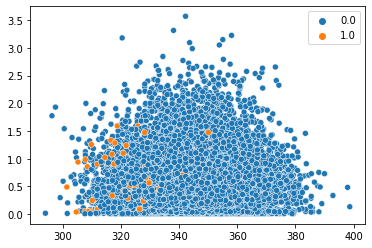

In [79]:
sns.scatterplot(e, var[:, 5], hue=d)

In [52]:
s.sort_values(by='R_hat').tail(20)

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
"beta[4,7]",0.860,0.1000,0.680,-0.350,0.890,1.900,44.0,0.0420,1.1
theta[493],3.200,0.3100,1.500,0.740,3.100,5.900,25.0,0.0240,1.1
log_lik[827],-1.100,0.0640,0.460,-1.900,-1.000,-0.430,52.0,0.0500,1.1
theta[792],4.000,0.0660,0.610,3.000,4.000,5.000,85.0,0.0810,1.1
theta[141],3.100,0.0560,0.510,2.200,3.100,3.900,83.0,0.0790,1.1
log_lik[680],-0.460,0.0700,0.400,-1.300,-0.340,-0.048,33.0,0.0310,1.1
theta[140],3.200,0.0530,0.440,2.500,3.200,3.900,70.0,0.0670,1.1
log_lik[9],-0.050,0.0024,0.023,-0.093,-0.046,-0.021,87.0,0.0840,1.1
theta[237],3.100,0.0670,0.550,2.200,3.100,4.000,69.0,0.0660,1.1


In [80]:
from modelling.util.data_loader import load_data
from modelling.util.data_formatters import format_hierarchical_data

In [82]:
from modelling.inference import run_model, get_hier_priors

In [83]:
stan_opts = dict(
    show_progress=True,
    iter_sampling=4000,
    threads_per_chain=4,
    seed=1,
    adapt_delta=0.8,
    max_treedepth=10,
)
df = load_data(include_dummies=True, norm_data=True)
model = stan.CmdStanModel(stan_file='modelling/stan_models/hierarchical_non_centered.stan', model_name='hier')
data = format_hierarchical_data(df, ['chest_pain_type'])
priors = get_hier_priors(data)
run_model(model, data, priors, stan_opts, 'inference_non_centered')


In [90]:
from modelling.posterior_predictive import make_plots

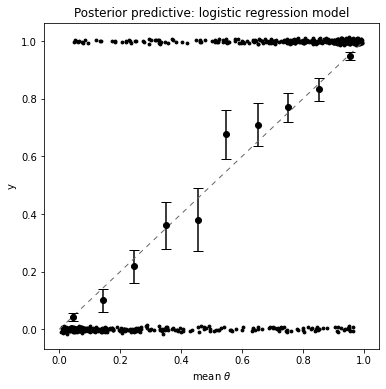

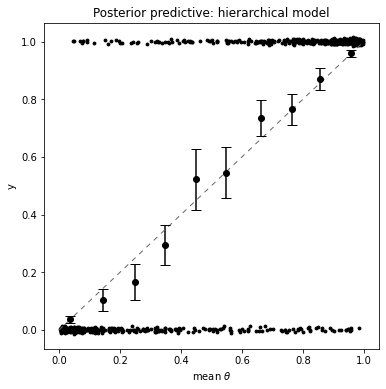

In [92]:
make_plots('inference_adapt_delta')